In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
merged_path = './merged_lexicon.csv'
merged = pd.read_csv(merged_path)  
test_path = './Data/olid-test.csv'
test = pd.read_csv(test_path)  
pd.set_option('display.max_colwidth', None)

# Design a (simple) lexicon-lookup approach

In [3]:
merged

,unit,hate-label
0,%e2%80%99ndrangheta,0
1,'ndrangheta,0
2,"(0, 0, 0)",1
3,(to get) dumped,0
4,(white) trash,0
...,...,...
12465,👮,0
12466,👶,1
12467,💢,1
12468,🚻,1


In [4]:
test.head()

,id,text,labels
0,15923,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1
1,27014,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0
2,30530,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0
3,13876,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0
4,60133,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1


In [5]:
# The string you want to check for
target_string = 'hated'

# Check if 'target_string' is in 'column_name' and get True or False
result = merged['unit'].str.contains(target_string).any()

print(result)

True


# Run this approach with the 4 lexicons

In [6]:
# Load the merged lexicon (from Step 3)
merged_lexicon = pd.read_csv('./merged_lexicon.csv')
# Drop instances where 'hate-label' is equal to 0
merged_lexicon = merged_lexicon[merged_lexicon['hate-label'] != 0]

# Load the OLID test dataset
test_data = pd.read_csv('./Data/olid-test.csv')


[[516 104]
 [163  77]]


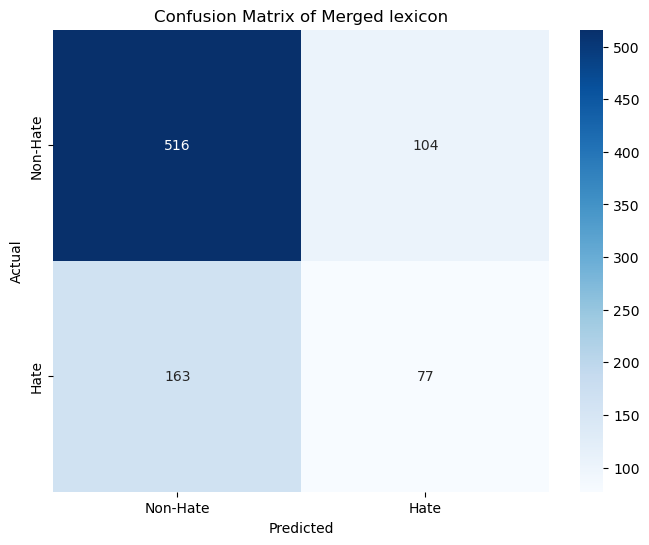

Classification Report for Merged lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.76      0.83      0.79       620
        Hate       0.43      0.32      0.37       240

    accuracy                           0.69       860
   macro avg       0.59      0.58      0.58       860
weighted avg       0.67      0.69      0.67       860



,Text,True_Labels,Negative_Word_Count,Predicted_Labels
0,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1,0,0
1,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0,1,0
2,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0,0,0
3,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0,0,0
4,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1,0,0
...,...,...,...,...
855,#DespicableDems lie again about rifles. Dem Distorted the Law to Push Gun-Control at Kavanaugh Confirmation URL via @USER,1,3,1
856,#MeetTheSpeakers 🙌 @USER will present in our event OIW 2018: Finpact - Global Impact through Financial Technologies. She is Senior Advisor Group Sustainable Finance and worked on green energy and climate risk. Join us to meet Thina URL #oiw2018 URL,0,1,0
857,3 people just unfollowed me for talking about merlin sorry y'all im still up covinsky's ass im just waiting for a psisly sequel announcement ive run out of witty and funny tweets about tatbilb i am drained,1,2,1
858,"#WednesdayWisdom Antifa calls the right fascist when, in all reality, they and the left are following the same scenario as the Third Reich: indoctrination of our youth, trying to control minorities and a total lack of understanding or knowledge of history. #WalkAway",0,2,1


In [38]:
def lexicon_lookup_and_evaluate(text_column, labels_column, lexicon, colum_name=None, name=None):
    """
    Perform lexicon-based hate speech identification and evaluate the results based on the number of negative words.

    Parameters:
        text_column (pd.Series): The column containing the input text to classify.
        labels_column (pd.Series): The column containing the true labels (0 for non-hate, 1 for hate).
        lexicon (pd.DataFrame): The merged lexicon containing hate speech terms and labels.
        colum_name (str): the column name in the dataframe.
        name (str): name to be added to Confusion Matrix.

    Returns:
        pd.DataFrame: A DataFrame containing the original text, true labels, predicted labels, and the confusion matrix.
    """
    # Create a DataFrame to store results
    results_df = pd.DataFrame({'Text': text_column, 'True_Labels': labels_column})

    # Define a function to count negative words in the text
    def count_negative_words(text, lexicon):
        tokens = text.lower().split()  # Convert to lowercase for case-insensitive matching
        negative_word_count = 0
        for token in tokens:
            if token in lexicon[colum_name].values:
                negative_word_count += 1
        return negative_word_count

    # Apply the count_negative_words function to the text data
    results_df['Negative_Word_Count'] = text_column.apply(lambda x: count_negative_words(x, lexicon))

    # Classify tweets as hate speech if they contain more than 2 negative words
    results_df['Predicted_Labels'] = np.where(results_df['Negative_Word_Count'] > 1, 1, 0)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(results_df['True_Labels'], results_df['Predicted_Labels'])
    print(conf_matrix)

    # Create a confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Hate', 'Hate'],
                yticklabels=['Non-Hate', 'Hate'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of ' + name)
    plt.show()

    # Generate a classification report
    report = classification_report(results_df['True_Labels'], results_df['Predicted_Labels'], target_names=['Non-Hate', 'Hate'])

    # Print the classification report
    print("Classification Report for " + name + ":\n")
    print(report)

    return results_df

# Example usage:
# Assuming 'test_data' is your test dataset and 'merged_lexicon' is your lexicon DataFrame
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], merged_lexicon, colum_name='unit', name="Merged lexicon")

In [39]:
# Define the path to the base lexicon file
path = r"../Assignment 3 - Group 11/Data/lexicon-of-abusive-words-master/Lexicons/"

featur_base_lexicon_path = path + "expandedLexicon.txt"
df_featur_base_lexicon = pd.read_csv(featur_base_lexicon_path, sep='\t', header=None, names=["word", "label"], encoding="utf-8")
df_featur_base_lexicon.head()
df_featur_base_lexicon['word'] = df_featur_base_lexicon['word'].str.replace(r'_[a-zA-Z]+$', '', regex=True)

# Drop instances where 'label' is less than or equal to 0
df_featur_base_lexicon = df_featur_base_lexicon[df_featur_base_lexicon['label'] > 0]
df_featur_base_lexicon.head()

,word,label
0,horrible,3.679601
1,disgusting,3.493682
2,moron,3.469677
3,bastard,3.399238
4,stupid,3.323882


[[616   4]
 [218  22]]


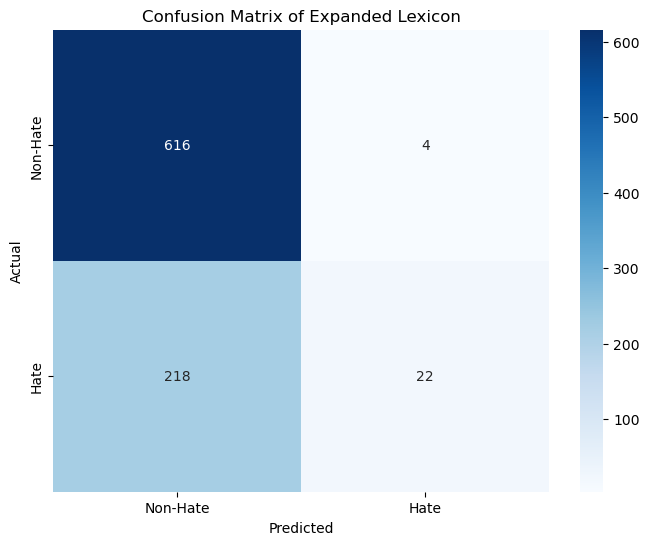

Classification Report for Expanded Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.74      0.99      0.85       620
        Hate       0.85      0.09      0.17       240

    accuracy                           0.74       860
   macro avg       0.79      0.54      0.51       860
weighted avg       0.77      0.74      0.66       860



,Text,True_Labels,Negative_Word_Count,Predicted_Labels
0,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1,0,0
1,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0,1,0
2,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0,0,0
3,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0,0,0
4,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1,0,0
...,...,...,...,...
855,#DespicableDems lie again about rifles. Dem Distorted the Law to Push Gun-Control at Kavanaugh Confirmation URL via @USER,1,0,0
856,#MeetTheSpeakers 🙌 @USER will present in our event OIW 2018: Finpact - Global Impact through Financial Technologies. She is Senior Advisor Group Sustainable Finance and worked on green energy and climate risk. Join us to meet Thina URL #oiw2018 URL,0,0,0
857,3 people just unfollowed me for talking about merlin sorry y'all im still up covinsky's ass im just waiting for a psisly sequel announcement ive run out of witty and funny tweets about tatbilb i am drained,1,1,0
858,"#WednesdayWisdom Antifa calls the right fascist when, in all reality, they and the left are following the same scenario as the Third Reich: indoctrination of our youth, trying to control minorities and a total lack of understanding or knowledge of history. #WalkAway",0,1,0


In [41]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_featur_base_lexicon , colum_name='word', name = "Expanded Lexicon")


In [42]:
path= r"../Assignment 3 - Group 11/Data/"
hurtlex_EN = path+"hurtlex_EN.tsv"

# Read the TSV file into a DataFrame
df_hurtlex_EN = pd.read_csv(hurtlex_EN, sep='\t', encoding='utf-8')
df_hurtlex_EN.head()

,id,pos,category,stereotype,lemma,level
0,EN1382,n,qas,no,gag reel,inclusive
1,EN7077,a,cds,no,snotty,conservative
2,EN6856,n,is,yes,mendicant,conservative
3,EN5485,n,re,no,maffias,conservative
4,EN5024,n,cds,no,lying in trade,conservative


[[527  93]
 [167  73]]


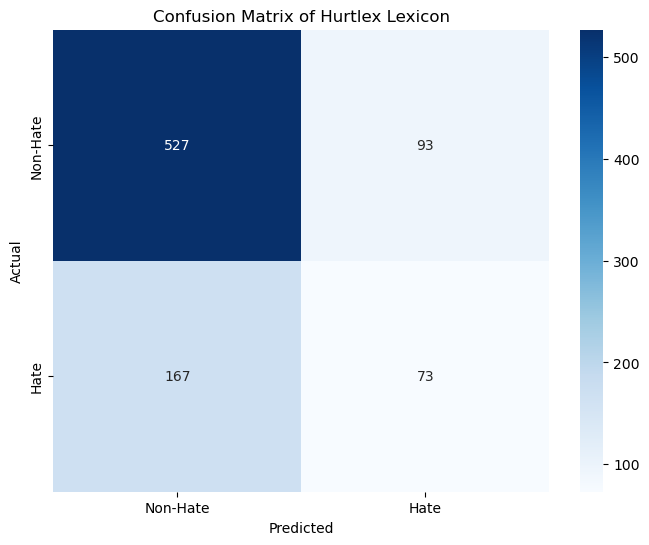

Classification Report for Hurtlex Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.76      0.85      0.80       620
        Hate       0.44      0.30      0.36       240

    accuracy                           0.70       860
   macro avg       0.60      0.58      0.58       860
weighted avg       0.67      0.70      0.68       860



,Text,True_Labels,Negative_Word_Count,Predicted_Labels
0,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1,0,0
1,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0,0,0
2,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0,0,0
3,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0,0,0
4,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1,0,0
...,...,...,...,...
855,#DespicableDems lie again about rifles. Dem Distorted the Law to Push Gun-Control at Kavanaugh Confirmation URL via @USER,1,2,1
856,#MeetTheSpeakers 🙌 @USER will present in our event OIW 2018: Finpact - Global Impact through Financial Technologies. She is Senior Advisor Group Sustainable Finance and worked on green energy and climate risk. Join us to meet Thina URL #oiw2018 URL,0,1,0
857,3 people just unfollowed me for talking about merlin sorry y'all im still up covinsky's ass im just waiting for a psisly sequel announcement ive run out of witty and funny tweets about tatbilb i am drained,1,2,1
858,"#WednesdayWisdom Antifa calls the right fascist when, in all reality, they and the left are following the same scenario as the Third Reich: indoctrination of our youth, trying to control minorities and a total lack of understanding or knowledge of history. #WalkAway",0,1,0


In [44]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_hurtlex_EN , colum_name='lemma', name = "Hurtlex Lexicon")


In [45]:
path= r"../Assignment 3 - Group 11/Data/"
mol =path+"mol.csv"

# Read the csv file into a DataFrame
df_mol = pd.read_csv(mol)

# Drop rows where en-hate-label is equal to 0
df_mol = df_mol[df_mol['en-hate-label'] != '0']

# Display the first few rows
df1 = df_mol[['en-american-english','en-hate-label']]

In [46]:
df1.dropna()

,en-american-english,en-hate-label
5,slut,sexism
6,slut,sexism
24,0,partyism
53,libtard,partyism
57,0,partyism
...,...,...
944,come out of the closet,homophobia
973,suck a dick,sexism
978,rough face,sexism
981,ladies of the night (hoes),sexism


[[620   0]
 [240   0]]


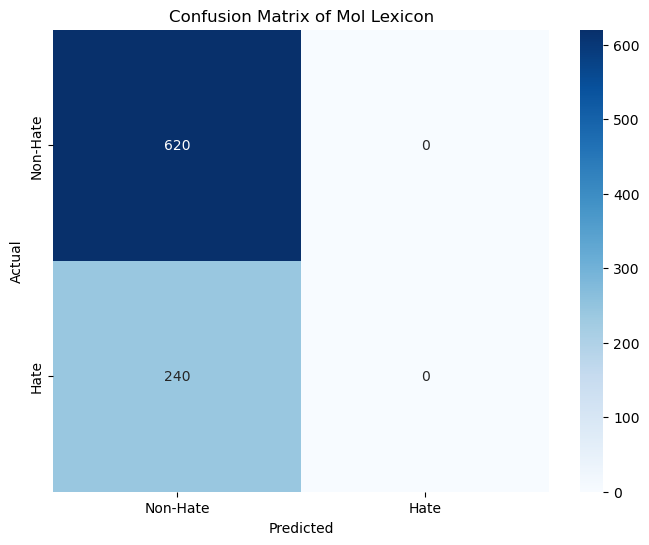

Classification Report for Mol Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.72      1.00      0.84       620
        Hate       0.00      0.00      0.00       240

    accuracy                           0.72       860
   macro avg       0.36      0.50      0.42       860
weighted avg       0.52      0.72      0.60       860



C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Text,True_Labels,Negative_Word_Count,Predicted_Labels
0,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",1,0,0
1,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",0,0,0
2,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",0,0,0
3,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,0,0,0
4,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,1,0,0
...,...,...,...,...
855,#DespicableDems lie again about rifles. Dem Distorted the Law to Push Gun-Control at Kavanaugh Confirmation URL via @USER,1,0,0
856,#MeetTheSpeakers 🙌 @USER will present in our event OIW 2018: Finpact - Global Impact through Financial Technologies. She is Senior Advisor Group Sustainable Finance and worked on green energy and climate risk. Join us to meet Thina URL #oiw2018 URL,0,0,0
857,3 people just unfollowed me for talking about merlin sorry y'all im still up covinsky's ass im just waiting for a psisly sequel announcement ive run out of witty and funny tweets about tatbilb i am drained,1,0,0
858,"#WednesdayWisdom Antifa calls the right fascist when, in all reality, they and the left are following the same scenario as the Third Reich: indoctrination of our youth, trying to control minorities and a total lack of understanding or knowledge of history. #WalkAway",0,1,0


In [47]:
lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df1 , colum_name='en-american-english', name = "Mol Lexicon")
